## CNN's and other cool neural networks stuff
```During this exercise you will train, examine and visualize convolutional neural networks. Images are a very unique example of high dimensional data. There are, indeed, many dimensions - even for low-resolution images (let's say, 32x32 pixels), while regarding each pixel as a feature, you can end up with hundreds of features. Such large vectors are, generally speaking, hard to visualize, but images make it all much easier, you can just draw the image. We will use this nice property to explore our networks. ```

~```Ittai Haran```

### Examining CNNs

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Dropout, Softmax
from keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\MMM\Anaconda2\envs\python3_ittai\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


```As you recall, you used before the MNIST dataset. Now we will use a much harder dataset - CIFAR10, which contains low resolution images of 10 different objects - airplace, automobile, bird, cat, deer, dog, frog, horse, ship and truck. Start by loading the dataset.
Notice: the values given to pixels are in the range [0,255]. You might want to move them to the range [0,1] for later use in your neural networks.```

In [11]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
num_to_words = {0:'airplane',1:'automobile',2:'bird',3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

```Draw a random picture using plt.imshow function.```

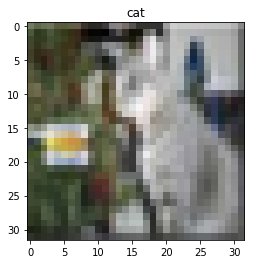

In [13]:
place = 78
plt.title(num_to_words[Y_train[place][0]])
plt.imshow(X_train[place])
plt.show()

```Create a fully connected neural network that predicts the right class. after compiling your neural network (model.compile) you can use model.summary to print the architecture of your network. Use it, and make sure you have less than 2,000,000 parameters. Use any activations you'ld like.
Notice: Youl'd probably like to use the softmax activation on your last layer. Your network will have to get flattened vectors (or get matrices and flatten them on her own, using the Flatten layer) - what shape should your input have?
Use the adam optimizer. What should be the loss in this classification problem?```

In [14]:
input_shape = (32,32,3)
main_input = Input(input_shape)
hidden = Dense(500, activation='tanh')(Flatten()(main_input))
hidden = Dense(200, activation='tanh')(hidden)
hidden = Dense(100, activation='tanh')(hidden)
hidden = Dense(50, activation='tanh')(hidden)
main_output = Dense(10, activation='softmax')(hidden)
model = Model(inputs=[main_input], outputs=[main_output])
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total para

```Train your network for 40 epochs (or 10 minutes, whichever comes faster) and get train accuracy of more than 0.6. What is the accuracy computed on the test? Would you say you are in overfit situation? explain your answer.```

In [15]:
model.fit(X_train, np.eye(10)[Y_train.reshape(-1)], batch_size=500, epochs=40, verbose=1)
from sklearn.metrics import accuracy_score
print(accuracy_score(np.argmax(model.predict(X_train, batch_size=500), axis=-1), Y_train))
print(accuracy_score(np.argmax(model.predict(X_test, batch_size=500), axis=-1), Y_test))

Epoch 1/40
50000/50000 [==============================] - 5s 97us/step - loss: 2.0553
Epoch 2/40
50000/50000 [==============================] - 4s 84us/step - loss: 1.8056
Epoch 3/40
50000/50000 [==============================] - 4s 84us/step - loss: 1.7155
Epoch 4/40
50000/50000 [==============================] - 4s 83us/step - loss: 1.6571
Epoch 5/40
50000/50000 [==============================] - 4s 83us/step - loss: 1.5990
Epoch 6/40
50000/50000 [==============================] - 4s 85us/step - loss: 1.5685
Epoch 7/40
50000/50000 [==============================] - 4s 85us/step - loss: 1.5395
Epoch 8/40
50000/50000 [==============================] - 4s 86us/step - loss: 1.5145
Epoch 9/40
50000/50000 [==============================] - 4s 85us/step - loss: 1.4865
Epoch 10/40
50000/50000 [==============================] - 4s 85us/step - loss: 1.4649
Epoch 11/40
50000/50000 [==============================] - 4s 85us/step - loss: 1.4467
Epoch 12/40
50000/50000 [===========================

```We will now attack the same problem using a simple CNN. Build a CNN model as follows:```
- ```Input layer```
- ```Convolutional layer of 32 filters of size (3,3) with relu activation```
- ```Convolutional layer of 32 filters of size (3,3) with relu activation```
- ```Max pooling layer```
- ```Dropout layer of p=0.25```
- ```Convolutional layer of 64 filters of size (3,3) with relu activation```
- ```Convolutional layer of 64 filters of size (3,3) with relu activation```
- ```Max pooling layer```
- ```Dropout layer of p=0.25```
- ```Flattning layer (Flatten in keras)```
- ```Fully connected layer of 200 hidden units```
- ```Dropout layer of p=0.5```
- ```Output layer```

```Use the same loss as with the fully connected model and the same optimizer. How many weights are there in your network? Train it for 40 epochs. What train loss did you get? What test loss did you get? How is it similar to the fully connected case?```

In [16]:
input_shape = (32,32,3)
main_input = Input(input_shape)
hidden = Conv2D(32, (3,3), activation='relu')(main_input)
hidden = Conv2D(32, (3,3), activation='relu')(hidden)
hidden = MaxPool2D()(hidden)
hidden = Dropout(0.25)(hidden)

hidden = Conv2D(64, (3,3), activation='relu')(hidden)
hidden = Conv2D(64, (3,3), activation='relu')(hidden)
hidden = MaxPool2D()(hidden)
hidden = Dropout(0.25)(hidden)


hidden = Dense(200, activation='tanh')(Flatten()(hidden))
hidden = Dropout(0.5)(hidden)
main_output = Dense(10, activation='linear')(hidden)
main_output = Softmax()(main_output)

model = Model(inputs=[main_input], outputs=[main_output])
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
__________

In [17]:
model.fit(X_train, np.eye(10)[Y_train.reshape(-1)], batch_size=500, epochs=40, verbose=1)

Epoch 1/40
50000/50000 [==============================] - 18s 360us/step - loss: 1.8582
Epoch 2/40
50000/50000 [==============================] - 16s 322us/step - loss: 1.4930
Epoch 3/40
50000/50000 [==============================] - 16s 325us/step - loss: 1.3359
Epoch 4/40
50000/50000 [==============================] - 16s 321us/step - loss: 1.2368
Epoch 5/40
50000/50000 [==============================] - 16s 323us/step - loss: 1.1394
Epoch 6/40
50000/50000 [==============================] - 16s 320us/step - loss: 1.0757
Epoch 7/40
50000/50000 [==============================] - 15s 303us/step - loss: 1.0118
Epoch 8/40
50000/50000 [==============================] - 18s 355us/step - loss: 0.9720
Epoch 9/40
50000/50000 [==============================] - 21s 430us/step - loss: 0.9252
Epoch 10/40
50000/50000 [==============================] - 22s 448us/step - loss: 0.9007
Epoch 11/40
20500/50000 [===========>..................] - ETA: 13s - loss: 0.8727

KeyboardInterrupt: 

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(np.argmax(model.predict(X_train, batch_size=500), axis=-1), Y_train))
print(accuracy_score(np.argmax(model.predict(X_test, batch_size=500), axis=-1), Y_test))

0.7337
0.7082


```We will now experience with visualization and interpretation of the network. Given a single image, we would like to know what parts of the image contribute most to the prediction of the network. In order to do, each time we will black out part of the image, to get all the possible images with blacked out part:```

![title](resources/image_for_notebook.png)

```In total you will have, for a 32x32 image, 1,024 blacked images. Write a function that, given an image (32x32x3 matrix) and a parameter``` $a$ ```, creates a new tensor (of shape 1024x32x32x3) so that tensor[num] is the original image with a blacked out square of edge size``` $a$ ```, concentrated around the (num//32,num%32)-pixel. We will call the output tensor the "variation tensor".```

In [19]:
def create_blacked_block(size=4):
    size_half = int(size/2)
    count_of_images = (32)**2
    blackening_block = np.ones((count_of_images,32,32,))
    for i in np.arange(count_of_images).astype(int):
        blackening_block[i, np.clip(i//32-size_half, 0, 32):np.clip(i//32+size_half, 0, 32), np.clip(i%32-size_half, 0, 32):np.clip(i%32+size_half, 0, 32)]=0
    return blackening_block

def get_blacked_variations(image, size=4):
    blackening_block = create_blacked_block(size)
    image_vars = np.expand_dims(image, axis=0)*np.expand_dims(blackening_block, -1)
    return image_vars

```Use``` $a=4$ ```and choose a random image from the test segment that got labeled correctly using your model. Create, using the function you recently wrote, the variation tensor. Create the model's predictions for every blacked image in the tensor (using model.predict(tensor)).
You will get a matrix of shape 1024x10. Take only the column that matches the image's label, so you get a 1024-dimensions vector. Reshape it to be a 32x32 image. Now every pixel tells the probability of the model to label the image correctly, while there is a blacked out square concentrated around that pixel. Show the original image and the image you got. Normalize the scale of the image you got to the range [0,1] using plt.imshow(..., vmin=0, vmax=1).
Take your time to examine the procedure you just created on different images.```

In [20]:
def mask_coloring_yellow(image, mask):
    image_temp = image.copy()
    image_temp[:,:,0] = np.clip(image_temp[:,:,0] + mask, 0, 1)
    image_temp[:,:,1] = np.clip(image_temp[:,:,1] + 0.78*mask, 0, 1)
#     image_temp[:,:,0] = np.clip(image_temp[:,:,0] + (mask>0).astype(float), 0, 1)
    return image_temp

frog frog


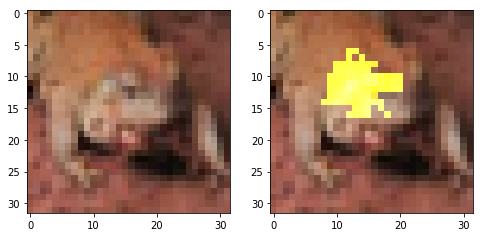

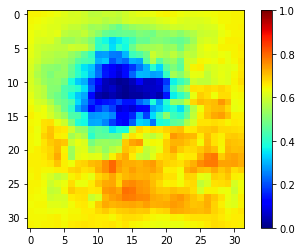

In [25]:
place = 5
size = 4
image = X_test[place]
image_tag = int(Y_test[place])
blacked_vars = get_blacked_variations(image, size)
predicted = model.predict(blacked_vars)

image_temp = image.copy()
mask = 1-predicted[:,int(image_tag)].reshape(32,32)
mask[mask<sorted(mask.reshape(-1))[-80]]=0
image_masked = mask_coloring_yellow(image, mask)

print(num_to_words[image_tag], num_to_words[np.argmax(model.predict(np.expand_dims(image, 0)))])
fig, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(image)
ax[1].imshow(image_masked)
plt.show()

plt.imshow(predicted[:,image_tag].reshape(32,32), vmin=0, vmax=1, cmap='jet')
plt.colorbar()
plt.show()

```You can get a concept of "network focus" using the visualization you created.
Given the heatmap you created, find the 80 pixels with smallest values. That means, the pixels that, when removing a square around them, we get the maximum damage to the network prediction. Mark these pixels in the original image (actually, in a copy of the original image - you don't want to destroy your data) by adding 0.5 to the red component of the rgb.
Show the original image, the heatmap image and the marked image.```

### Transfer learning

```We've talked in class about transfer learning. Here you will experience with a simple task of transfer learning. We will take a VGGFace model, trained to predict faces among 2,622 classes, and use it to discriminate between the faces of two men: Gal and Philip. We will do it by cutting out the last layers and replacing them with layers of our own.```

In [2]:
from keras_vggface import VGGFace, utils # an extra directory supplied with the exercise
from sklearn.model_selection import train_test_split

#This next import will help you with augmentation - generating augmented photos from your originals.
#Read about this general teqnique, and also about ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.models import Model

```Start by loading the data in images.pkl and in images_labels.pkl. Show an image of Gal and an image of Philip and make sure you can tell the difference ;)```

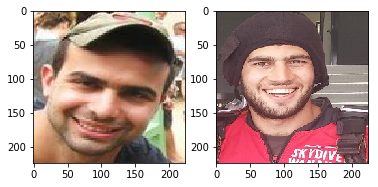

In [3]:
import pickle
with open('data/images.pkl', 'rb') as f:
    X = pickle.load(f)
with open('data/images_labels.pkl', 'rb') as f:
    Y = pickle.load(f)
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[0])
ax[1].imshow(X[3])
plt.show()

```In transfer learning we take a trained model, cut off its end and replace it with some layers of our own. Hence we will have to preprocess our data the same way it was preprocessed when training VGGFace. Use the following line to do so:```
```python
X_processed = utils.preprocess_input(X.copy().astype(float), version=1)
```
```Transform the values of Y to be [1 0] or [0 1]. Split your data to 80% train data and 20% test data.```

In [4]:
from sklearn.model_selection import train_test_split
X_processed = utils.preprocess_input(X.copy().astype(float), version=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, pd.get_dummies(Y).values, train_size=0.8)

C:\Users\MMM\Anaconda2\envs\python3_ittai\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


```Let's look at the VGGFace model we are about to use. Load it:```

In [5]:
vgg_model = VGGFace()

```The model is fitted to predict the name of the celebrity in the pictures it gets. Read the example picture given to you in face_example.pkl. Show it. Transform it into a tensor of shape (1, 224, 224, 3) and use utils.preprocess_input as seen before to get it ready to enter to your network. Use```
```python
utils.decode_predictions(model.predict(x))
```
```To get 5 most probable classes. Who is the man in the picture?```

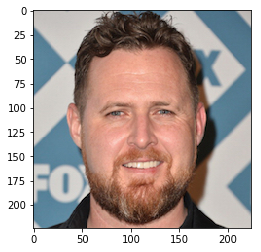

[[["b'A.J._Buckley'", 0.97900885],
  ["b'David_Denman'", 0.0014457259],
  ["b'Carmine_Giovinazzo'", 0.00086765114],
  ["b'Robert_Buckley'", 0.000724567],
  ["b'Eddie_Cahill'", 0.0004183303]]]

In [6]:
with open('data/face_example.pkl', 'rb') as f:
    x = pickle.load(f)
plt.imshow(x.astype(int))
plt.show()
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1)
utils.decode_predictions(vgg_model.predict(x))

```Let's return to our dataset. As you could impress, it's a pretty small one. Hence we can try to make it bigger using augmentations of the data. We will do it here using a mechanism supplied by keras. Create an instance of keras.preprocessing.image.ImageDataGenerator, which will define how you will create augmentations of each original image you've created. Choose all the parameters on your own (consider, for example, rotation_range, zoom_range, width_shift_range, horizontal_flip and so on).```

In [7]:
train_gen = ImageDataGenerator(rotation_range=90, width_shift_range=0.1, height_shift_range=0.1,zoom_range=0.2, horizontal_flip=True)

```Follow the following instructions:```
- ```Examine the architecture of the VGGFace model using .summary(). Understand what it means to replace the last 2 dense layers (including the final softmax layer). How many weights are there in the model?```
- ```Use .get_layer() to retrieve the last layer which you want to keep in your new network```
- ```Create 2 new Dense layers which continue the previous pretrained layers (the last layer should have a softmax activation, for the first one try tanh)```
- ```Create a new model with the input of the original model as input (vgg_model.input), and which outputs the new dense-softmax layer```
- ```Freeze all of the layers except the last 2 using .layers on the new model, and .trainable = False. This will stop you from training those layers```
- ```Compile the model with sgd optimizer and with metric=['accuracy'] (what does it do?)```

In [8]:
vgg_model.summary()
nb_class = 2
hidden_dim = 100

vgg_model = VGGFace()
dense_1 = vgg_model.get_layer('fc6/relu').output
new_dense_1 = Dense(hidden_dim, activation='tanh', name='fc7')(dense_1)
out = Dense(nb_class, activation='softmax', name='fc8')(new_dense_1)
custom_vgg_model = Model(vgg_model.input, out)

for layer in custom_vgg_model.layers[:-2]:
    layer.trainable = False
    
custom_vgg_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

In [9]:
custom_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
__________

```Now you're ready to train the model:```
- ```Use .fit_generator() and not .fit(), since you'll be using the augmentor you created```
- ```Use .flow() on the instance of ImageDataGenerator as the first input```
- ```Choose a combination of batch_size(within .flow) and steps_per_epoch which will create a total number of images that you want per each epoch. You will have to use small batches (~20) so you won't get memory error```
- ```Use the test segment to validate your results - you can compute your score on the validation if you add validation_data=(X_test, Y_test) in your .fit_generator function```

```Could you transfer the VGGFace model to your new task?```

In [10]:
custom_vgg_model.fit_generator(train_gen.flow(X_train, Y_train, batch_size=20), \
        steps_per_epoch=13, epochs=5, validation_data=(X_test, Y_test),)

Epoch 1/5
13/13 [==============================] - 29s 2s/step - loss: 0.7664 - acc: 0.6389 - val_loss: 0.2646 - val_acc: 0.9091
Epoch 2/5
13/13 [==============================] - 10s 763ms/step - loss: 0.4403 - acc: 0.7902 - val_loss: 0.1987 - val_acc: 0.9455
Epoch 3/5
13/13 [==============================] - 10s 755ms/step - loss: 0.3064 - acc: 0.8677 - val_loss: 0.1816 - val_acc: 0.9273
Epoch 4/5
13/13 [==============================] - 12s 939ms/step - loss: 0.3282 - acc: 0.8441 - val_loss: 0.1423 - val_acc: 0.9455
Epoch 5/5
13/13 [==============================] - 10s 759ms/step - loss: 0.3406 - acc: 0.8358 - val_loss: 0.1887 - val_acc: 0.9091
